Diana Pineda Valencia 
Cod. 20222579020

*Teoria y logica de programación*

*01-04-2023*

##*CURVA GRANULOMETRICA*##

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
Malla= pd.Series([
    "#4", #Tamiz #4
    "#10", #Tamiz #10
    "#20", #Tamiz #20
    "#40", #Tamiz #40
    "#60", #Tamiz #60
    "#140", #Tamiz #140
    "#200", #Tamiz #200
])

In [ ]:
Abertura= pd.Series([
    "4.750", #Abertura Tamiz #4
    "2.000", #Abertura Tamiz #10
    "0.850", #Abertura Tamiz #20
    "0.2425", #Abertura Tamiz #40
    "0.250", #Abertura Tamiz #60
    "0.106", #Abertura Tamiz #140
    "0.075", #Abertura Tamiz #200
])

In [ ]:
Retenido= pd.Series([
    0, #Tamiz #4
    25, #Tamiz #10
    40, #Tamiz #20
    56, #Tamiz #40
    47, #Tamiz #60
    25, #Tamiz #140
    23, #Tamiz #200
    
])

In [ ]:
Acum=[] #Matriz donde se guardan los datos 
#Realizar calculo de datos, valor retenidido mas valor acumulado 
Acum.append(Retenido[0]+0)
Acum.append(Retenido[1]+Acum[0])
Acum.append(Retenido[2]+Acum[1])
Acum.append(Retenido[3]+Acum[2])
Acum.append(Retenido[4]+Acum[3])
Acum.append(Retenido[5]+Acum[4])
Acum.append(Retenido[6]+Acum[5])
Ret_Acu =pd.Series(Acum)

In [ ]:
AcuP=[] 
#Realizar Calculo, valor Acumulado total - valor retenido el el primer tamiz
AcuP.append(Acum[6]-Retenido[0])

#Valor acumulado menos el valor retenido en cada tamiz
AcuP.append(AcuP[0]-Retenido[1])
AcuP.append(AcuP[1]-Retenido[2])
AcuP.append(AcuP[2]-Retenido[3])
AcuP.append(AcuP[3]-Retenido[4])
AcuP.append(AcuP[4]-Retenido[5])
AcuP.append(AcuP[5]-Retenido[6])
Pasa = pd.Series(AcuP)

In [ ]:
Granulometria = pd.DataFrame({  #Se crea la tabla con los valores que se deben ingresar en cada columna 
    'Malla': Malla,
    'Abertura': Abertura,
    'Retenido': Retenido,
    'Retenido Acumulado': Ret_Acu,
    'Pasa': Pasa
})
Granulometria

,Malla,Abertura,Retenido,Retenido Acumulado,Pasa
0,#4,4.750,0,0,216
1,#10,2.000,25,25,191
2,#20,0.850,40,65,151
3,#40,0.2425,56,121,95
4,#60,0.250,47,168,48
5,#140,0.106,25,193,23
6,#200,0.075,23,216,0


In [ ]:
Peso_Total = Granulometria["Retenido"].sum() #Obtenemos el peso total de la muestra de suelo 
Peso_Total

216

In [ ]:
Porpasa=[] #Obtenemos el porcentaje que pasa en cada tamiz, con el peso que pasa y el peso total
Porpasa.append((Pasa[0]*100)/Peso_Total)
Porpasa.append((Pasa[1]*100)/Peso_Total)
Porpasa.append((Pasa[2]*100)/Peso_Total)
Porpasa.append((Pasa[3]*100)/Peso_Total)
Porpasa.append((Pasa[4]*100)/Peso_Total)
Porpasa.append((Pasa[5]*100)/Peso_Total)
Porpasa.append((Pasa[6]*100)/Peso_Total)
Porcen_Pasa = pd.Series(Porpasa)

In [ ]:
Granulometria = pd.DataFrame({ #Tabla con la nueva columna de %Pasa
    'Malla': Malla,
    'Abertura': Abertura,
    'Retenido': Retenido,
    'Retenido Acumulado': Ret_Acu,
    'Pasa': Pasa,
    '% Pasa': Porcen_Pasa
})
Granulometria

,Malla,Abertura,Retenido,Retenido Acumulado,Pasa,% Pasa
0,#4,4.750,0,0,216,100.000000
1,#10,2.000,25,25,191,88.425926
2,#20,0.850,40,65,151,69.907407
3,#40,0.2425,56,121,95,43.981481
4,#60,0.250,47,168,48,22.222222
5,#140,0.106,25,193,23,10.648148
6,#200,0.075,23,216,0,0.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

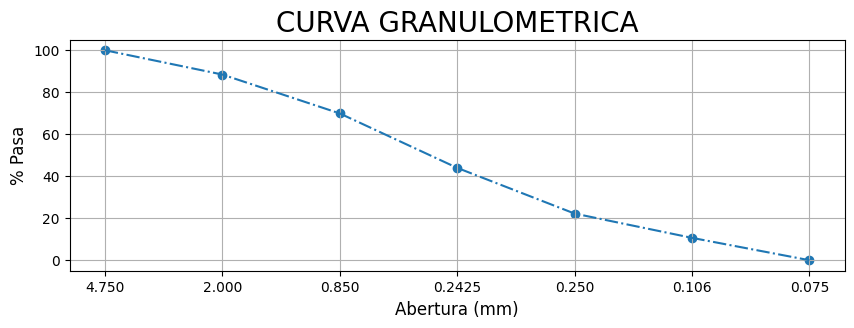

In [ ]:
# Crear datos de ejemplo
df=Granulometria


# Datos que se van a graficar en cada eje 
x=(df['Abertura'])
y=(df['% Pasa'])


fig = plt.figure(figsize=(10, 3)) #Dimensiones de los ejes 
plt.scatter(x, y)
plt.plot(x, y, linestyle = "dashdot")  #Caracteristica de la garfica
plt.grid(True, which='both') #Grilla de la grafica 
plt.xlabel("Abertura (mm)",fontsize=12) #Titulo eje x
plt.ylabel("% Pasa",fontsize=12) #Titulo eje y
plt.title("CURVA GRANULOMETRICA",fontsize=20) #Titulo de la grafica 
plt.show()

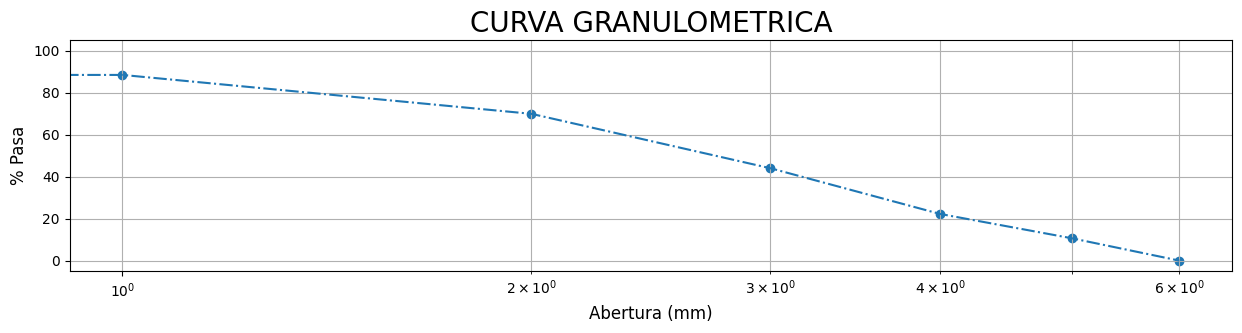

In [ ]:
# Crear datos de ejemplo
df=Granulometria


# Graficar retención acumulada
x=(df['Abertura'])
y=(df['% Pasa'])

#Tenemos los datos de la grafica anterior 
fig = plt.figure(figsize=(15, 3))
plt.scatter(x, y)
plt.plot(x, y, linestyle = "dashdot")
plt.grid(True, which='both')
plt.xscale("log")  #Agregamos escala logaritmica en el eje x
plt.xlabel("Abertura (mm)",fontsize=12)
plt.ylabel("% Pasa",fontsize=12)
plt.title("CURVA GRANULOMETRICA",fontsize=20)
plt.show()